<a href="https://colab.research.google.com/github/GreatLearningAIML1/gurgaon-feb-batch-abhishek02git/blob/master/GL_R8_External_Lab_Questions_CIFAR10_Transfer_Learning_TFIDF_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.constraints import Constraint
from tensorflow.keras.optimizers import SGD, Adam, Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras import backend as K

import os
import glob
import cv2
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
tf.set_random_seed(100)

### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
train_index = np.array([y_train <=4]).reshape(y_train.shape[0])
y_train_1 = y_train[train_index]
X_train_1 = X_train[train_index]

test_index = np.array([y_test <=4]).reshape(y_test.shape[0])
y_test_1 = y_test[test_index]
X_test_1 = X_test[test_index]

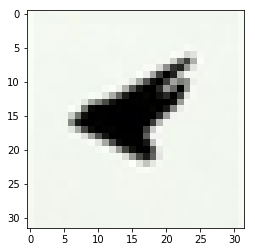

In [5]:
plt.imshow(X_test_1[6])

In [0]:
train_index = np.array([y_train >4]).reshape(y_train.shape[0])
y_train_2 = y_train[train_index]
X_train_2 = X_train[train_index]

test_index = np.array([y_test >4]).reshape(y_test.shape[0])
y_test_2 = y_test[test_index]
X_test_2 = X_test[test_index]

In [7]:
X_train_1.shape,y_train_1.shape,X_test_1.shape,y_test_1.shape

((25000, 32, 32, 3), (25000, 1), (5000, 32, 32, 3), (5000, 1))

In [8]:
X_train_2.shape,y_train_2.shape,X_test_2.shape,y_test_2.shape

((25000, 32, 32, 3), (25000, 1), (5000, 32, 32, 3), (5000, 1))

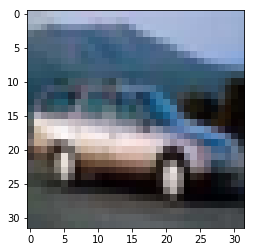

In [9]:
plt.imshow(X_train_1[1])

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
# convert class vectors to binary class matrices
y_train_1 = keras.utils.to_categorical(y_train_1)
y_test_1 = keras.utils.to_categorical(y_test_1)

In [11]:
y_train_1.shape, y_test_1.shape

((25000, 5), (5000, 5))

In [12]:
y_test_2.shape

(5000, 1)

In [0]:
y_train_2 = y_train_2-5
y_train_2 = keras.utils.to_categorical(y_train_2)
y_test_2 = y_test_2 - 5
y_test_2 = keras.utils.to_categorical(y_test_2)

In [14]:
y_train_2.shape, y_test_2.shape

((25000, 5), (5000, 5))

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
X_train_1 = X_train_1.reshape(X_train_1.shape[0],32,32,3)
X_test_1 = X_test_1.reshape(X_test_1.shape[0],32,32,3)
input_shape = (32,32,3)

In [0]:
X_train_1 = X_train_1.astype('float32')/255
X_test_1 = X_test_1.astype('float32')/255

In [17]:
print ('Number of images in X_train_1 is {}'.format(len(X_train_1)))
print ('Number of images in X_test_1 is {}'.format(len(X_test_1)))

Number of images in X_train_1 is 25000
Number of images in X_test_1 is 5000


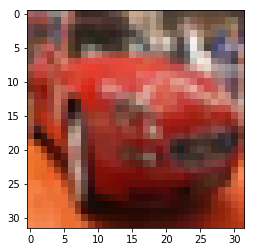

In [18]:
plt.imshow(X_train_1[2])

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(5,activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9

In [21]:
model.fit(X_train_1, y_train_1,batch_size=32, validation_data=(X_test_1,y_test_1),epochs = 10,callbacks=[])

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 12s 479us/sample - loss: 1.0341 - acc: 0.5807 - val_loss: 0.8683 - val_acc: 0.6550
Epoch 2/10
25000/25000 [==============================] - 9s 343us/sample - loss: 0.8255 - acc: 0.6734 - val_loss: 2.1506 - val_acc: 0.3994
Epoch 3/10
25000/25000 [==============================] - 9s 342us/sample - loss: 0.7171 - acc: 0.7249 - val_loss: 0.6894 - val_acc: 0.7368
Epoch 4/10
25000/25000 [==============================] - 9s 340us/sample - loss: 0.6485 - acc: 0.7517 - val_loss: 0.7056 - val_acc: 0.7314
Epoch 5/10
25000/25000 [==============================] - 9s 341us/sample - loss: 0.5917 - acc: 0.7772 - val_loss: 0.7521 - val_acc: 0.7264
Epoch 6/10
25000/25000 [==============================] - 9s 342us/sample - loss: 0.5526 - acc: 0.7920 - val_loss: 0.5652 - val_acc: 0.7834
Epoch 7/10
25000/25000 [==============================] - 9s 342us/sample - loss: 0.5174 - acc: 0.8035 - val_l

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [22]:
for layers in model.layers[:-5]:
  layers.trainable = False
  print (layers)
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [23]:
y_train_2.shape

(25000, 5)

In [24]:
model.fit(X_train_2,y_train_2,epochs=10,batch_size=32,validation_data=(X_test_2,y_test_2))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 208us/sample - loss: 1.0798 - acc: 0.5976 - val_loss: 70.5272 - val_acc: 0.5340
Epoch 2/10
25000/25000 [==============================] - 5s 199us/sample - loss: 0.7031 - acc: 0.7383 - val_loss: 69.9211 - val_acc: 0.5162
Epoch 3/10
25000/25000 [==============================] - 5s 198us/sample - loss: 0.6476 - acc: 0.7623 - val_loss: 68.6247 - val_acc: 0.5152
Epoch 4/10
25000/25000 [==============================] - 5s 207us/sample - loss: 0.6054 - acc: 0.7742 - val_loss: 69.4976 - val_acc: 0.5034
Epoch 5/10
25000/25000 [==============================] - 5s 199us/sample - loss: 0.5799 - acc: 0.7863 - val_loss: 88.6357 - val_acc: 0.4664
Epoch 6/10
25000/25000 [==============================] - 5s 198us/sample - loss: 0.5626 - acc: 0.7891 - val_loss: 80.1987 - val_acc: 0.4872
Epoch 7/10
25000/25000 [==============================] - 5s 198us/sample - loss: 0.5469 - acc: 0.7962 - 

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [27]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [29]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [30]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [31]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score